This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Arguments

- num_words: integer or None. Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data. If None, all words are kept. Defaults to None, so all words are kept.

- maxlen: int or None. Maximum sequence length. Any longer sequence will be truncated. Defaults to None, which means no truncation.
- test_split: Float between 0 and 1. Fraction of the dataset to be used as test data. Defaults to 0.2, meaning 20% of the dataset is used as test data.

Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

- x_train, x_test: lists of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words - 1. If the maxlen argument was specified, the largest possible sequence length is maxlen.

- y_train, y_test: lists of integer labels.

In [28]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [30]:
X_train.shape

(1395,)

In [31]:
len(X_train[10])

38

In [32]:
y_train.shape

(1395,)

In [34]:
X_train[1:5]

array([list([1, 486, 341, 785, 26, 14, 482, 26, 255, 606, 252, 83, 146, 91, 102, 17, 12]),
       list([1, 245, 273, 397, 124, 53, 191, 26, 14, 83, 26, 39, 32, 32, 11, 14, 19, 12, 11, 88, 279, 59, 11, 14, 472, 59, 11, 17, 12]),
       list([1, 53, 745, 26, 14, 722, 26, 39, 7442, 18, 14, 6353, 18, 88, 258, 44, 11, 14, 119, 70, 11, 17, 12]),
       list([1, 486, 341, 119, 26, 14, 119, 26, 7, 255, 346, 606, 252, 83, 146, 91, 272, 17, 12])],
      dtype=object)

In [35]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')


In [36]:
X_train.shape

(1395, 49)

In [37]:
y_train[30]

9

In [38]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [39]:
X_train.shape

(1395, 49, 1)

In [40]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [41]:
y_train[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:


def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model



In [47]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 0)
history=model.fit(X_train, y_train)

In [48]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

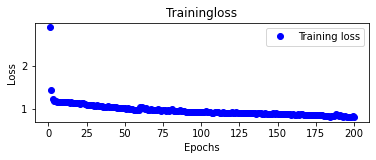

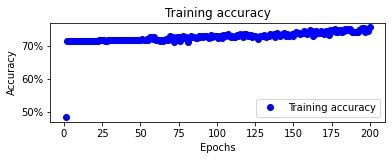

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(False)
plt.show()

In [52]:
history_dict.keys()

dict_keys(['loss', 'accuracy'])